In [1]:
import pandas as pd
import numpy as np
from salty import check_name
import salty
import keras
import pickle
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline

Using TensorFlow backend.


In [2]:
pickle_in = open("salts+descriptors.pkl", "rb")
df = pickle.load(pickle_in)
target=df['Specific density, kg/m<SUP>3</SUP>']
print('The target shape:'+ str(target.shape))
features=df.drop(['name-cation','name-anion','smiles-anion','smiles-cation','salt_name','Specific density, kg/m<SUP>3</SUP>'],axis=1)
print('The feature shape:'+ str(features.shape))
df.to_csv('salts+descriptors.csv')

The target shape:(25991,)
The feature shape:(25991, 190)


In [3]:
min_max=MinMaxScaler() #tranforming features
features=min_max.fit_transform(features) 

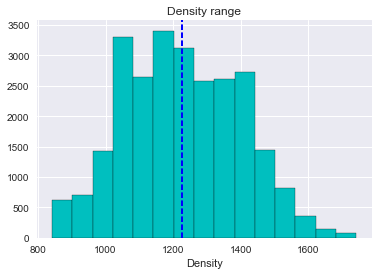

In [4]:
plt.hist(target,bins=15,color='c',edgecolor='black')
plt.axvline(target.mean(), color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Density')
plt.title('Density range')

In [5]:
lasso=Lasso(alpha=5) 
lasso_crossval=cross_val_score(lasso,features,target,cv=10) #returns R^2 predictions
print(lasso_crossval)
avg_lasso=np.mean(lasso_crossval)
avg_lasso

[ 0.7887274   0.27181564  0.344093    0.5073716   0.49929816  0.69460049
  0.51092853  0.60065762  0.59871072  0.68491717]


0.55011203211350201

In [6]:
parameters = {"alpha": list(np.linspace(1,10,10))}
model = Lasso()
grid = GridSearchCV(model,parameters)
grid_result = grid.fit(features,target)
print(grid_result.best_estimator_)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [7]:
lasso=grid_result.best_estimator_
lasso_crossval=cross_val_score(lasso,features,target,cv=10) #returns R^2 predictions
print(lasso_crossval)
avg_lasso=np.mean(lasso_crossval)
avg_lasso

[ 0.79102969  0.66836192  0.77174938  0.80971398  0.53652147  0.86191828
  0.85170941  0.71632646  0.73411244  0.87817245]


0.76196154940241645

In [8]:
rf=RandomForestRegressor(n_jobs=-1) #returns r^2 predictions #
rf_crossval=cross_val_score(rf,features,target,cv=10)
print(rf_crossval)
np.mean(rf_crossval)

[ 0.93028903  0.83582418  0.92305805  0.78295637  0.56873087  0.71646162
  0.73820562  0.85094651  0.8727158   0.9209284 ]


0.81401164620743616

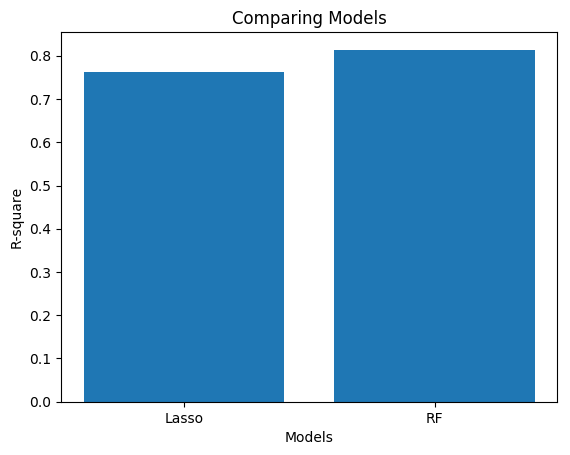

In [ ]:
plt.rcdefaults()
objects = ('Lasso', 'RF')
y_pos = np.arange(len(objects))
metric=[avg_lasso,np.mean(rf_crossval)]
plt.bar(y_pos, metric, align='center', alpha=1)
plt.xticks(y_pos,objects)
plt.xlabel('Models')
plt.ylabel('R-square')
plt.title('Comparing Models')
 
plt.show()

In [ ]:
features

In [ ]:
svr=SVR(kernel='linear') #returns r^2 predictions
cross_val_score(svr,features,target,cv=10)

Questions:
* Any suggestions for hyperparameter tuning/feature selection ?
* svr took too long, anyone used it?

Future work:  
* scale the features, with the minimum or the mean?
* explore various feature selection options and different metrics
* expand the data-base to get more unique smiles for CNN